In [115]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

BLACK = 0
MEDIUM_GRAY = 127
WHITE = 255

MAX = 256

def readImage(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def getLocalTime() -> str:
    named_tuple = time.localtime() # get struct_time
    return time.strftime("%d/%m/%Y, %H:%M:%S", named_tuple)


def showImage(image, cmap = 'gray') -> None:
    ax = plt.subplots()[1]
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)


def showImages(images, cmap = 'gray') -> None:
    _, axs = plt.subplots(nrows=1, ncols=len(images))

    for i in range(len(images)):
        axs[i].imshow(images[i], cmap = cmap, vmin = BLACK, vmax = WHITE)

    plt.tight_layout()

def saveImage(image, filename = 'result', cmap = 'gray', mode = 'sync') -> None:    
    ax = plt.subplots()[1]
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)
    plt.savefig(filename, bbox_inches = 'tight', pad_inches = 0)

    if mode == 'sync':
        plt.show()

def binarify(image, condition):
    result = np.zeros(image.shape)
    height, width = image.shape
    for i in range(0, height):
        for j in range(0, width):
            result[i][j] = condition(image[i][j]) * 255
            
    return result



1)	A partir da imagem original obtenha as outras imagens conforme descrição

Desejamos separar linhas de círculos. Uma operação de abertura com um elemento estruturante na forma de círculo (definir o raio) faz essa tarefa.


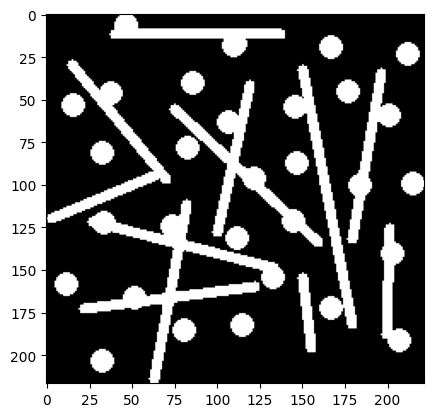

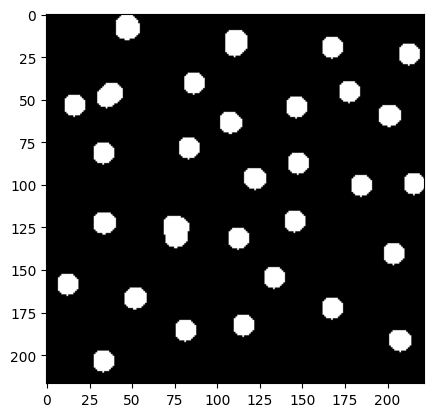

In [116]:
img1 = cv2.imread("art3.png", cv2.IMREAD_GRAYSCALE)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(12, 12))
img1_circles = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel)

# img1_lines = img1 - cv2.dilate(img1_circles, kernel, iterations = 1)

showImage(img1)
showImage(img1_circles)
# showImage(img1_lines)


2)

a) Obter linhas verticais. Abertura com elemento estruturante vertical 3x9
b) Obter linhas horizontais. Abertura com elemento estruturante horizontal 9x3. Tente eliminar as linhas erradas usando uma máscara maior


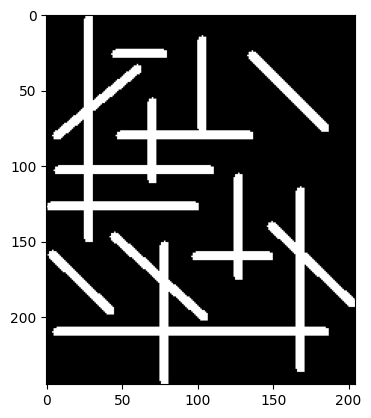

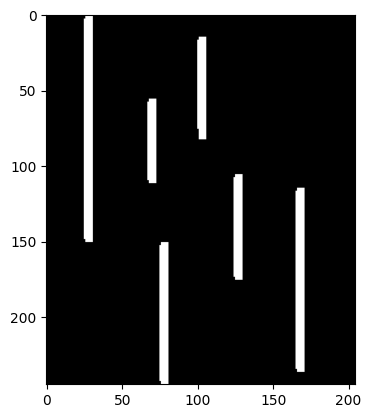

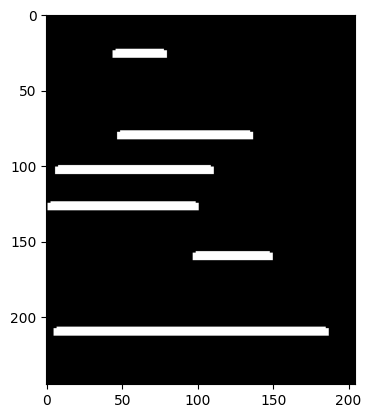

In [117]:
img2 = cv2.imread("art2.png", cv2.IMREAD_GRAYSCALE)

kernel = np.ones((9, 3), np.uint64) 
img2_vertical = cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel)

kernel = np.ones((5, 15), np.uint64) 
img2_horizontal = cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel)

showImage(img2)
showImage(img2_vertical)
showImage(img2_horizontal)

3)

a) Theshold (t=210)

b) Utilizando abertura com elemento circular de 11 pixels para reter as células grandes

c) É possível reter somente os objetos pequenos utilizando a operação abertura?

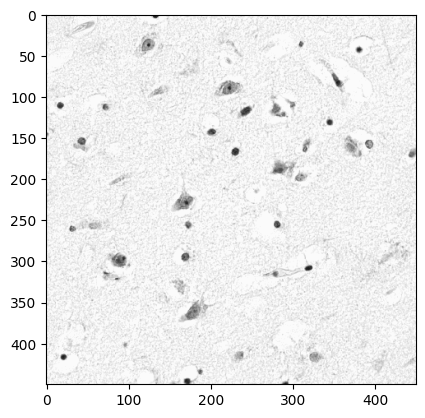

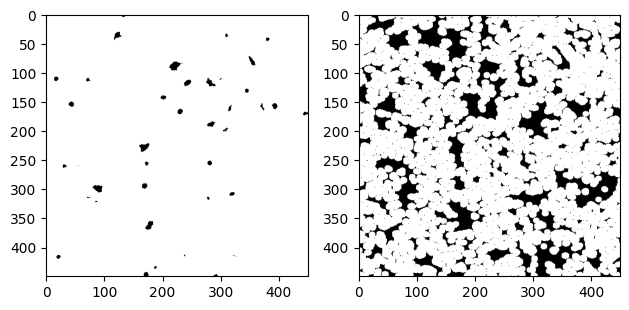

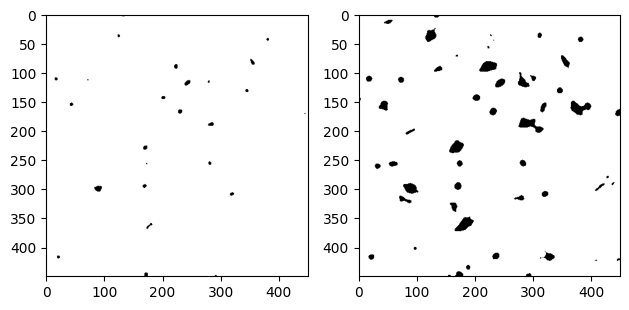

In [118]:
img3 = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)

def applyOpening(image, size):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size, size))
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    
def binarifyAndApplyOpening(image):
    thr, bin_img3_default = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    bin_img3_custom = binarify(image, lambda c: c >= 210)

    img3_points_default = applyOpening(bin_img3_default, 11)
    img3_points_custom = applyOpening(bin_img3_custom, 11)  
    
    return (img3_points_default, img3_points_custom)

img3_gaussed = cv2.GaussianBlur(img3, ksize=(9,9), sigmaX=0)

showImage(img3)
showImages(binarifyAndApplyOpening(img3))
showImages(binarifyAndApplyOpening(img3_gaussed))

4)
Utilizando os conceitos já aprendidos na disciplina, faça um código que calcula a quantidade de objetos da imagem abaixo. Pode-se utilizar funções prontas do opencv (não para realizar a contagem em si, mas para realizar os passos necessários)

count
311


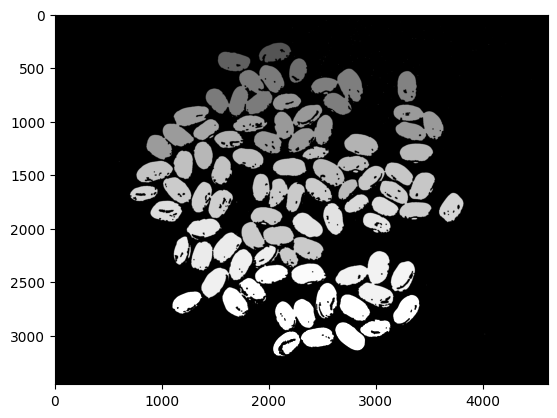

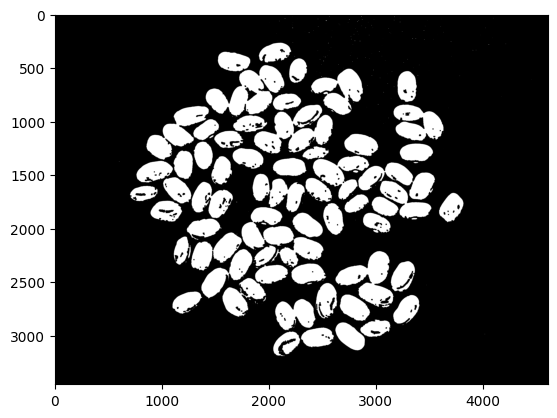

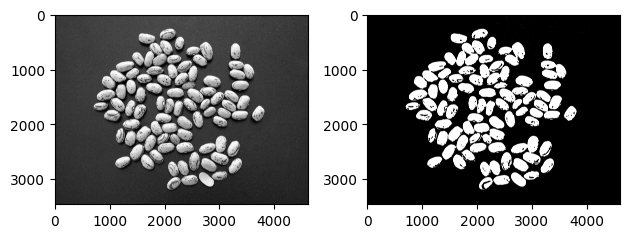

In [111]:
img4 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

kernel = np.ones((10,10), np.uint64) 

thr_img4, img4_binary = cv2.threshold(img4, 127, 255, cv2.THRESH_BINARY)
img4_closed = cv2.morphologyEx(img4_binary, cv2.MORPH_CLOSE, kernel)
num_components, components = cv2.connectedComponents(img4_closed)

showImage(components)
showImage(img4_closed)
showImages((img4, img4_closed))

print('count')
print(num_components)